# Multiple Regression

## Task 1
## Multiple Regression

## Part I: Research Question

> 1. How do services and tenure correlate?

> 2. The goal of this analysis is to find the services that correlate with customer tenure. For example, what services do the customers with the longest tenure use?

## Part II: Method Justification

> 1. Assumptions of multiple regression:

> There must be a linear relationship between the outcome variable and the independent variables.

> Multiple regression assumes that the residuals are normally distributed.

> Multiple regression assumes that the independent variables are not highly correlated with each other.

> The variance of error terms are similar across the values of the independent variables.

> Multiple linear regression requires at least two independent variables, which can be nominal, ordinal, or interval/ratio level variables.

> 2. We are using Python because it is very effective to use for data analysis. There are also many different packages that can be added to python to significantly increase the functionality, such as pandas and numpy. We are also using Jupyter Notebook because it allows us to easily create a readable report along with showing all the code.

> 3. Multiple regression will allow us to analyze each different type of service variable and find out the services and variables that correlate with tenure. An organization would then be able to use this information to try and lengthen overall customer tenure. Multiple regression will allow us to find the services and features that correlate with tenure.

## Part III: Data Preparation

> 1. Data preparation will consist of cleaning up bad data, such as replacing nulls, removing duplicated rows, etc. We will also convert categorical variables to numerical so we can run linear regression.

> 2. The target variable is Tenure. The predictor variables are all variables besides customer demographics, such as city, state, age, gender, location, and job. These are variables that the company cannot control and can not change. The other variables are possible for the company to try to change to increase tenure. We will be using the services variables such as Contract, Payment Methods, and Internet Service.

> 3. To prepare the data for analysis, we will be removing unneeded columns, describing the data, types, finding missing information, deleting duplicates, etc.

In [1]:
# Importing packages to be used
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data
df = pd.read_csv('Churn Data\churn_clean.csv')

In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# describing the data
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
# Checking for null values
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [6]:
# Checking for duplicates
df.duplicated().any()

False

In [7]:
# Removing the customer demograpic variables that we dont need
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng', 
             "Area",'TimeZone','Job'], axis=1)
df.head()

,Population,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,38,0,68,28561.99,Widowed,Male,No,7.978323,10,0,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,1,27,21704.77,Married,Female,Yes,11.699080,12,0,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,4,50,9609.57,Widowed,Female,No,10.752800,9,0,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,1,48,18925.23,Married,Male,No,14.913540,15,2,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,...,149.948316,271.493436,4,4,4,3,4,4,4,5


> 4. Univariate and Bivariate visualizations

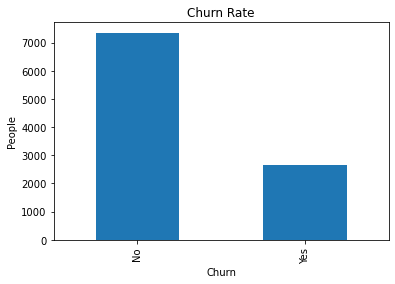

In [8]:
# Churn Data
churn_data = df['Churn'].value_counts()
churn_data.plot(kind='bar')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('People')
plt.show()

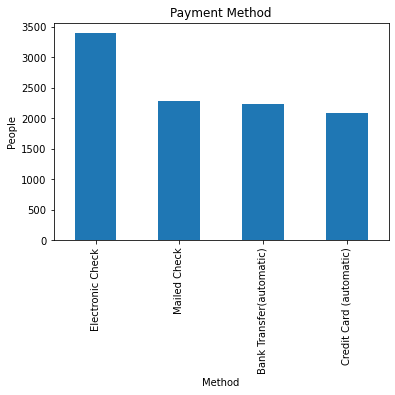

In [9]:
# Payment Data
payment_data = df['PaymentMethod'].value_counts()
payment_data.plot(kind='bar')
plt.title('Payment Method')
plt.xlabel('Method')
plt.ylabel('People')
plt.show()

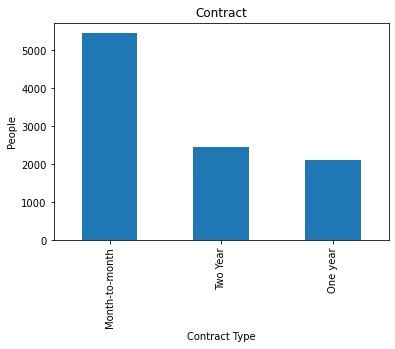

In [10]:
# Contract Data
payment_data = df['Contract'].value_counts()
payment_data.plot(kind='bar')
plt.title('Contract')
plt.xlabel('Contract Type')
plt.ylabel('People')
plt.show()

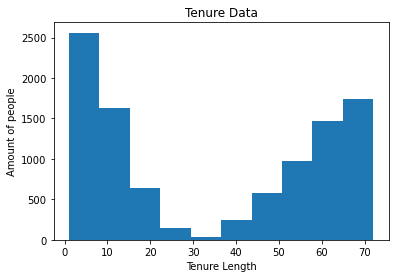

In [11]:
# Tenure Data
tenure_data = df['Tenure']
tenure_data.plot(kind='hist')
plt.title('Tenure Data')
plt.xlabel('Tenure Length')
plt.ylabel('Amount of people')
plt.show()

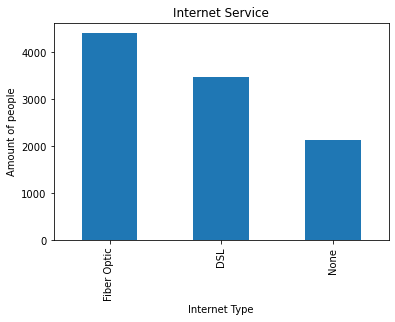

In [12]:
# Tenure Data
tenure_data = df['InternetService'].value_counts()
tenure_data.plot(kind='bar')
plt.title('Internet Service')
plt.xlabel('Internet Type')
plt.ylabel('Amount of people')
plt.show()

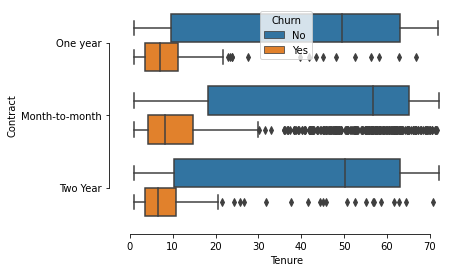

In [20]:
# Boxplot of tenure to contract, colored by churn
sns.boxplot(x="Tenure", y="Contract",
            hue="Churn",data=df)
sns.despine(offset=10, trim=True)

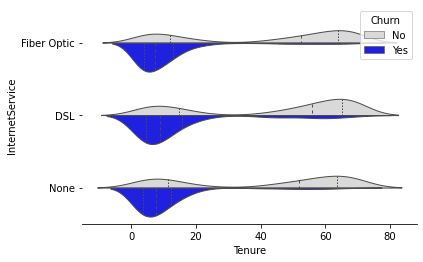

In [22]:
# Violin plot of tenure to internet service, colored by churn
sns.violinplot(data=df, x="Tenure", y="InternetService", hue="Churn",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

<AxesSubplot:xlabel='Tenure', ylabel='PaymentMethod'>

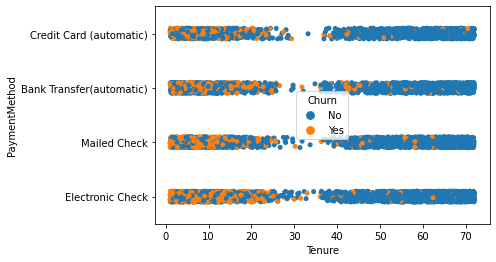

In [25]:
# Stripplot of tenure to payment method, colored by churn
sns.stripplot(data=df, x="Tenure", y="PaymentMethod", hue="Churn")

> 5. Export Data

In [16]:
# export file to csv
df.to_csv('cleaned_data.csv', index = False)

## Part IV: Model Comparison and Analysis

> 1. Initial regression

In [28]:
# Convert categorical variables to numerical
df = pd.get_dummies(df)

In [29]:
#Prepare variables
observations = len(df)
variables = df.columns[:-1]
X = df.iloc[:]
y = df['Tenure']

In [30]:
import statsmodels.api as sm

Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.764e+28
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:32:54   Log-Likelihood:             2.5506e+05
No. Observations:               10000   AIC:                        -5.100e+05
Df Residuals:                    9954   BIC:                        -5.097e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2.442e-14    6.9e-14      0.354      0.723   -1.11e-13     1.6e-13
Population                              5.505e-17   1.41e-18     39.040      0.000    5.23e-17    5.78e-17
Children                                1.904e-13   7.18e-14      2.653      0.008    4.97e-14    3.31e-13
Age                                     1.209e-14   7.64e-15      1.582      0.114   -2.89e-15    2.71e-14
Income                                 -4.016e-17   7.22e-19    -55.624      0.000   -4.16e-17   -3.87e-17
Outage_sec_perweek                      -1.37e-13   6.84e-15    -20.016      0.000    -1.5e-13   -1.24e-13
Email                                   1.005e-13   6.73e-15     14.929      0.000    8.73e-14    1.14e-13
Contacts                               -4.613e-14   2.06e-14     -2.239      0.025   -8.65e-14   -5.75e-15
Yearly_equip_failure                   -4.154e-13    3.2e-14    -12.973      0.000   -4.78e-13   -3.53e-13
Tenure                                     1.0000   1.89e-13   5.28e+12      0.000       1.000       1.000
MonthlyCharge                          -1.257e-14   7.07e-15     -1.778      0.075   -2.64e-14    1.28e-15
Bandwidth_GB_Year                       3.295e-15   2.31e-15      1.425      0.154   -1.24e-15    7.83e-15
Item1                                   2.791e-14   2.92e-14      0.957      0.339   -2.93e-14    8.51e-14
Item2                                   2.511e-14   2.73e-14      0.919      0.358   -2.85e-14    7.87e-14
Item3                                   4.147e-14   2.51e-14      1.655      0.098   -7.65e-15    9.06e-14
Item4                                  -9.724e-14   2.24e-14     -4.339      0.000   -1.41e-13   -5.33e-14
Item5                                  -1.696e-13   2.33e-14     -7.292      0.000   -2.15e-13   -1.24e-13
Item6                                   2.678e-15    2.4e-14      0.112      0.911   -4.43e-14    4.96e-14
Item7                                   3.532e-15   2.27e-14      0.156      0.876   -4.09e-14    4.79e-14
Item8                                  -1.077e-14   2.16e-14     -0.499      0.618    -5.3e-14    3.15e-14
Marital_Divorced                       -1.565e-14   4.24e-14     -0.369      0.712   -9.88e-14    6.75e-14
Marital_Married                        -3.386e-15   4.38e-14     -0.077      0.938   -8.93e-14    8.25e-14
Marital_Never Married                   4.063e-14   4.33e-14      0.938      0.348   -4.43e-14    1.26e-13
Marital_Separated                        1.59e-14   4.28e-14      0.372      0.710   -6.79e-14    9.97e-14
Marital_Widowed                        -8.715e-15   4.27e-14     -0.204      0.838   -9.24e-14     7.5e-14
Gender_Female                           6.947e-14   5.46e-14      1.272      0.203   -3

> 2. Reducing the dataset

> We can use correlation and heatmap to figure out the most important variables for regression

In [20]:
df.corr()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
Population,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.003559,-0.004778,...,0.006590,-0.006590,0.005882,-0.005882,-0.008656,0.008656,-0.001749,0.011399,-0.013628,0.006077
Children,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,...,0.007106,-0.007106,-0.003461,0.003461,-0.006828,0.006828,-0.005761,0.005771,0.003441,-0.003750
Age,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,...,0.000197,-0.000197,-0.010125,0.010125,-0.002247,0.002247,0.020689,-0.000372,0.000588,-0.020795
Income,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,...,0.003324,-0.003324,0.002186,-0.002186,0.012049,-0.012049,-0.013111,-0.005798,0.003597,0.014535
Outage_sec_perweek,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,...,-0.008952,0.008952,-0.018086,0.018086,0.011208,-0.011208,-0.007203,0.011445,0.004995,-0.009557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PaperlessBilling_Yes,0.008656,0.006828,0.002247,-0.012049,-0.011208,-0.012632,-0.002649,0.016603,-0.000655,0.001348,...,0.016353,-0.016353,-0.000692,0.000692,-1.000000,1.000000,0.005811,0.001891,0.003988,-0.012078
PaymentMethod_Bank Transfer(automatic),-0.001749,-0.005761,0.020689,-0.013111,-0.007203,-0.008311,0.021861,-0.009500,-0.014228,0.003266,...,-0.004482,0.004482,0.013449,-0.013449,-0.005811,0.005811,1.000000,-0.274714,-0.384229,-0.291882
PaymentMethod_Credit Card (automatic),0.011399,0.005771,-0.000372,-0.005798,0.011445,0.017390,0.003508,0.007344,0.011513,0.011922,...,-0.004575,0.004575,-0.013997,0.013997,-0.001891,0.001891,-0.274714,1.000000,-0.367992,-0.279547
PaymentMethod_Electronic Check,-0.013628,0.003441,0.000588,0.003597,0.004995,-0.009167,-0.004548,0.016798,-0.002885,-0.010610,...,0.007548,-0.007548,-0.001004,0.001004,-0.003988,0.003988,-0.384229,-0.367992,1.000000,-0.390989


<AxesSubplot:>

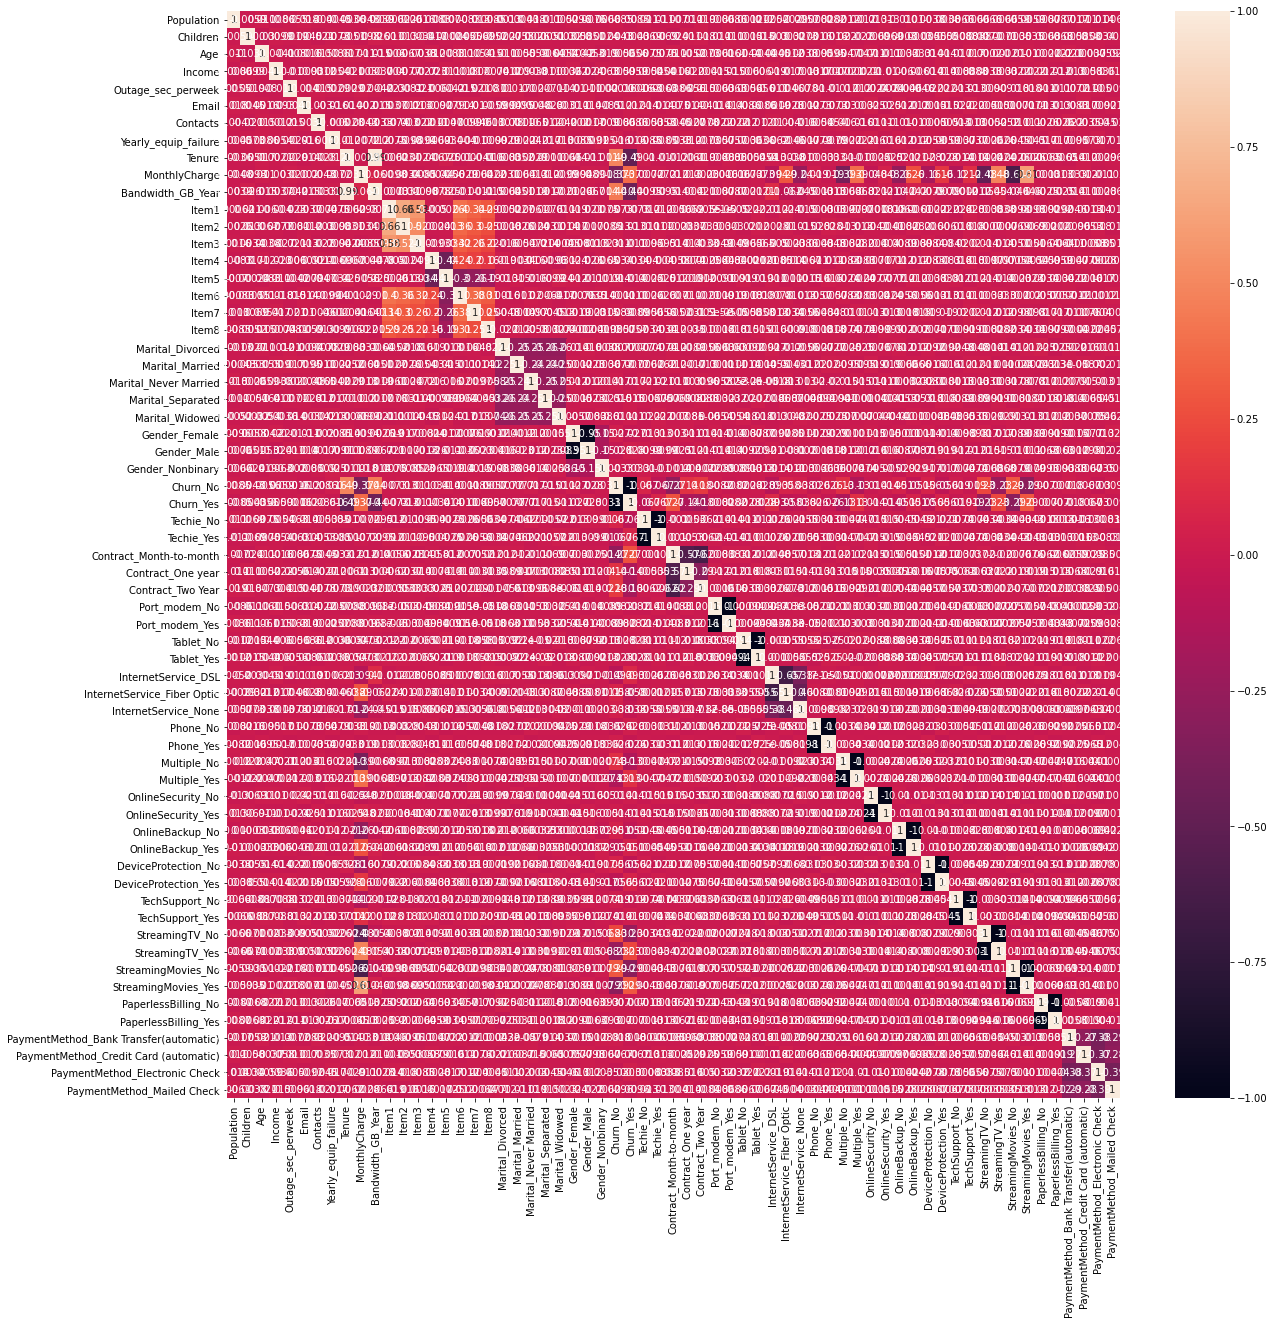

In [21]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

> We are finding the values that correlate with Churn_Yes. These values are Contract_Month-to-month, Tenure, StreamingTV_Yes, StreamingMovies_Yes, MonthlyCharge, Bandwidth_GB_Year.

> 3. Reduced regression model

In [31]:
#Prepare variables
observations = len(df)
variables = df.columns[:-1]
X = df[['Contract_Month-to-month','Tenure','StreamingTV_Yes','StreamingMovies_Yes','MonthlyCharge','Bandwidth_GB_Year']]
y = df['Tenure']

Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.777e+31
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:33:11   Log-Likelihood:             2.7575e+05
No. Observations:               10000   AIC:                        -5.515e+05
Df Residuals:                    9993   BIC:                        -5.514e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9.237e-14   1.38e-14      6.706      0.000    6.54e-14    1.19e-13
Contract_Month-to-month  -8.58e-14   5.15e-15    -16.672      0.000   -9.59e-14   -7.57e-14
Tenure                      1.0000   8.94e-16   1.12e+15      0.000       1.000       1.000
StreamingTV_Yes          -4.33e-15   6.79e-15     -0.638      0.524   -1.76e-14    8.98e-15
StreamingMovies_Yes     -1.732e-14   7.36e-15     -2.352      0.019   -3.18e-14   -2.88e-15
MonthlyCharge           -7.416e-17   9.62e-17     -0.771      0.441   -2.63e-16    1.14e-16
Bandwidth_GB_Year        9.216e-17   1.08e-17      8.494      0.000    7.09e-17    1.13e-16
==============================================================================
Omnibus:                    17570.154   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.820
Skew:                          -0.074   Prob(JB):                    7.93e-147
Kurtosis:                       1.738   Cond. No.                     2.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis

> 1. Explain data analysis process

> The variable selection technique was using correlation and heatmaps to figure out the variables that correlate the most with churn.

> The model evaluation metrics are shown in the regression results

> Plot Residuals:

In [32]:
import matplotlib as mpl
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

mpl.rcParams['figure.figsize'] = (10,5)

In [33]:
#Create Test and Training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

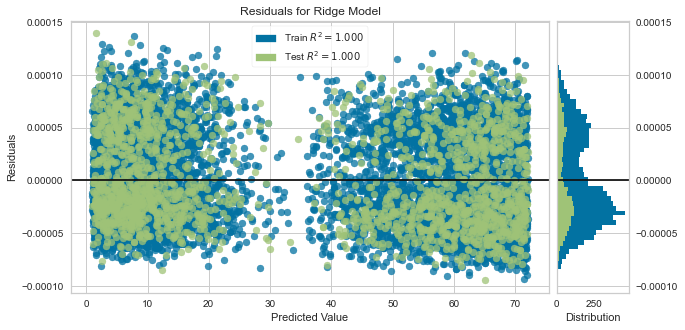

In [34]:
#Plot Residuals
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)   
g = visualizer.poof()

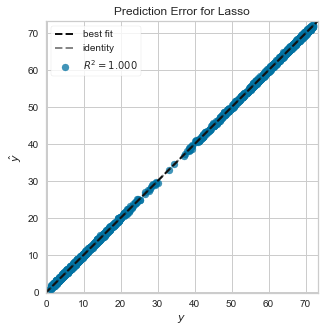

In [35]:
# Error Model
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

## Part V: Data Summary and Implications

> Different coefficiants have different affects on the results of churn. Some have a higher correlation with churn and some have a lower correlation with churn. We found that values that correlate with Churn_Yes. These values are Contract_Month-to-month, Tenure, StreamingTV_Yes, StreamingMovies_Yes, MonthlyCharge, Bandwidth_GB_Year. Other variables have a lower correlation with churn or a higher correlation with NO churn.

> The limitations of this data analysis is only running one type of model on the dataset, which can cause inacurate results. The dataset is also 10,000 rows, which is a lot, but not nearly enough to encompass all of the people that could be affected by an analysis like this. There could be so many more people and data that just were not included in this data set that could change the results.

> A course of action a company could take based on these results is trying to get customers to sign up for other contract lengths rather than month-to-month, as this contract length has a high correlation with churn.